In [77]:
from aeon.forecasting.compose import make_reduction
from aeon.datasets import load_airline
from sklearn.ensemble import GradientBoostingRegressor
from aeon.utils.plotting import plot_series
import numpy as np
from aeon.forecasting.model_selection import temporal_train_test_split


In [78]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train
fh = np.arange(len(y_test)) + 1

In [79]:
regressor = GradientBoostingRegressor(max_depth=None)
forecaster = make_reduction(regressor, window_length=20, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=fh)

In [80]:
forecaster

RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor(max_depth=None),
                                     window_length=20)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

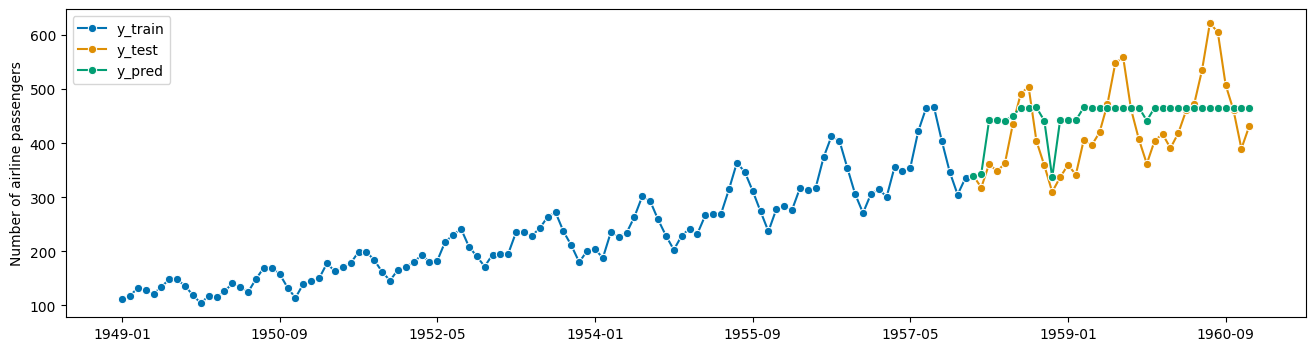

In [81]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])